In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.tree import DecisionTreeClassifier 


In [7]:
df = pd.read_csv('youtubefinaladded.csv')

In [8]:
df

,Unnamed: 0,index,category_id,likes_log,views_log,dislikes_log,comment_log,title_wordcnt,tag_word_count,Unnamed: 0.1,...,went,white,wild,wired,without,world,wrong,year,years,young
0,0,0,22.0,10.96,13.53,8.00,9.68,7,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,24.0,11.48,14.70,8.72,9.45,10,12,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,23.0,11.89,14.98,8.58,9.01,10,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,24.0,9.23,12.75,6.50,7.67,5,34,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,24.0,11.79,14.56,7.60,9.77,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40856,40856,40856,15.0,10.55,14.34,7.23,7.89,6,3,40856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40857,40857,40857,22.0,11.00,13.88,5.95,8.28,5,1,40857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40858,40858,40858,24.0,10.78,13.88,6.94,8.29,14,51,40858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40859,40859,40859,1.0,12.17,15.55,7.95,9.48,6,15,40859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df = df.drop(['index'],axis = 1)

In [10]:
df = df.drop(['Unnamed: 0'],axis = 1) 

In [11]:
df = df.drop(['Unnamed: 0.1'],axis = 1)

In [7]:
df = df.drop(['channel_title'],axis = 1)

In [8]:
df['category_id'] = df['category_id'].astype(int)

In [9]:
df = df.drop(['category_name'],axis = 1)

In [12]:
df

,category_id,likes_log,views_log,dislikes_log,comment_log,title_wordcnt,tag_word_count,acoustic,actually,ad,...,went,white,wild,wired,without,world,wrong,year,years,young
0,22.0,10.96,13.53,8.00,9.68,7,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,11.48,14.70,8.72,9.45,10,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,11.89,14.98,8.58,9.01,10,19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,9.23,12.75,6.50,7.67,5,34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,11.79,14.56,7.60,9.77,5,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40856,15.0,10.55,14.34,7.23,7.89,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40857,22.0,11.00,13.88,5.95,8.28,5,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40858,24.0,10.78,13.88,6.94,8.29,14,51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40859,1.0,12.17,15.55,7.95,9.48,6,15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x = df.drop('category_id', axis=1)
y = df.category_id

In [ ]:
## Baseline Model

In [94]:
import numpy as np
from sklearn.dummy import DummyClassifier
start = time.time()

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_test, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.score(x_test, y_test)
baseline_runtime = time.time() - start


In [95]:
dummypred = dummy_clf.predict(x_test)


In [96]:
a0 = evaluate(y_test, dummypred, 'Baseline')

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


In [220]:
unique_words = list(x.columns.values)

In [16]:
pca2 = PCA(n_components=5)
pca2.fit(x)
x2_pca = pca2.transform(x)
x2_pca = pd.DataFrame(x2_pca)

pca3 = PCA(n_components=6)
pca3.fit(x)
x3_pca = pca3.transform(x)
x3_pca = pd.DataFrame(x3_pca)

In [17]:
pca2.explained_variance_

array([200.97183513,  14.28562887,  10.29929857,   0.95261437,
         0.64505752])

In [18]:
pca3.explained_variance_

array([200.97183513,  14.28562887,  10.29929857,   0.95261437,
         0.64505752,   0.40034893])

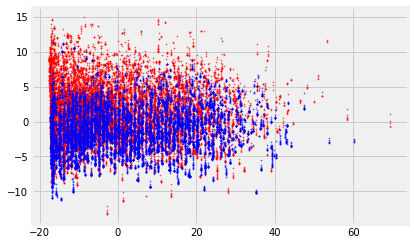

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x2_pca[0][:21000], x2_pca[1][:21000], s=1.5, alpha = 0.5, c = 'red')
plt.scatter(x2_pca[0][21001:], x2_pca[1][21001:], s=1.5, alpha = 0.5, c = 'blue')

In [20]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [29]:
results = pd.DataFrame()

In [27]:
def evaluate(test, pred, model):
    return [model, 
            precision_score(test, pred, average = 'weighted'), 
            recall_score(test, pred,average = 'weighted'), 
            accuracy_score(test, pred), 
            f1_score(test, pred, average = 'weighted')]

In [28]:
def print_accuracy_indices(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))

# K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  

0.8255230637464823


In [151]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [152]:
find_best_k(x_train, y_train, x_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.9078596503416098


In [30]:
a = evaluate(y_test, knn_predictions, 'K Nearest Neighbors')

##### Best K is 1 for KNN model

In [71]:
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_runtime = time.time() - start

In [23]:
knn_pred = knn_classifier.predict(x_test)
print_accuracy_indices(y_test, knn_pred)

Precision Score: 0.9087968860111894
Recall Score: 0.9075003058852319
Accuracy Score: 0.9075003058852319
F1 Score: 0.9078596503416096


## Random Forest

In [23]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
# Predicting the Test set results
rfy_pred = rfclassifier.predict(x_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rfy_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted  1.0   2.0   10.0  15.0  17.0  19.0  20.0  22.0  23.0  24.0  25.0  \
Actual                                                                        
1.0         492     0     2     1     0     1     0     1     0    10     1   
2.0           0    74     1     0     0     0     0     2     1     6     0   
10.0          2     0  1229     0     1     0     0     4     3    10     2   
15.0          1     0     0   157     1     0     0     1     4     8     0   
17.0          4     0     1     0   390     0     0     1     0     5     3   
19.0          1     1     0     0     0    64     0     1     1     1     3   
20.0          0     0     3     0     0     0   157     1     1     3     0   
22.0          1     0    12     1     5     0     0   581     7    13     2   
23.0          0     0    11     0     1     0     0     7   653    25     0   
24.0          4     0    18     0     7     2     0     8    17  1931    10   
25.0          0     1     5     1     1     0     0 

In [25]:
start = time.time()
rfclassifier = RandomForestClassifier(n_estimators=100)
rfclassifier.fit(x_train, y_train)
rf_runtime = time.time() - start

In [35]:
rf_pred = rfclassifier.predict(x_test)  

In [31]:
feature_importances = pd.DataFrame(rfclassifier.feature_importances_,
                                   index = x.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [32]:
feature_importances.head(20)

,importance
likes_log,0.081543
comment_log,0.073102
tag_word_count,0.071148
dislikes_log,0.066801
views_log,0.066686
title_wordcnt,0.057890
video,0.021599
official,0.017681
audio,0.012817
trailer,0.012615


In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.stripplot(x="continent", y="HappinessScore", data=df, jitter=True)
plt.xticks(rotation=45, size = 25)
plt.yticks(size =25)
plt.ylabel(ylabel = 'Happiness Score', size =25)
plt.xlabel(xlabel = 'Continents', size =25)

In [36]:
b = evaluate(y_test, rf_pred, "Random Forest")

# Adaptaive Boosting Tree

In [39]:
start = time.time()
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)
ab_runtime = time.time() - start
ab_pred = adaboost_clf.predict(x_test)
print_accuracy_indices(y_test, ab_pred)

Precision Score: 0.23813675464380757
Recall Score: 0.30001223540927446
Accuracy Score: 0.30001223540927446
F1 Score: 0.18297924604238197


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
pd.crosstab(y_test, ab_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,10,17,24,All
True,,,,,
1,4,13,0,493,510
2,0,0,1,83,84
10,0,441,6,812,1259
15,0,4,0,170,174
17,0,0,21,389,410
19,0,1,2,72,75
20,0,2,8,155,165
22,0,23,1,600,624
23,0,16,3,691,710


In [40]:
c = evaluate(y_test, ab_pred, 'Adapative Boosting Tree')

## Gradient Boosting

In [41]:
start = time.time()
gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(x_train, y_train)
gb_runtime = time.time() - start
gb_pred = gbt_clf.predict(x_test)
print_accuracy_indices(y_test, gb_pred)

Precision Score: 0.7828934913836353
Recall Score: 0.6736816346506791
Accuracy Score: 0.6736816346506791
F1 Score: 0.6730341511704082


In [ ]:
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y) 

In [42]:
d = evaluate(y_test, gb_pred, 'Gradient Boosting')

## SVM

In [43]:
svm_train, svm_test, svmy_train, svmy_test = train_test_split(x, y, test_size = 0.2)

In [45]:
start = time.time()
svm_clf = svm.NuSVC(kernel='rbf',nu=0.01)
svm_clf.fit(svm_train, svmy_train)
svm_runtime = time.time() - start
svm_runtime

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


207.99267196655273

In [96]:
#As a matter of fact, Looped from 1. to 0.1 (decreasing in decimal units) 
#and still got the error, then just tried with 0.01 and no complaints arose. 
#But of course, you should check the results of fitting your model with that value

In [46]:
svm_pred = svm_clf.predict(svm_test)
print_accuracy_indices(svmy_test, svm_pred)

Precision Score: 0.5381308339744817
Recall Score: 0.530404992046984
Accuracy Score: 0.530404992046984
F1 Score: 0.5225116528981367


In [47]:
e = evaluate(y_test, svm_pred, 'SVM')

## Decision Trees

In [48]:
start = time.time()
dt_classifier = DecisionTreeClassifier()  
dt_classifier.fit(x_train, y_train) 
dt_runtime = time.time() - start

In [50]:
dt_pred = dt_classifier.predict(x_test)  
print_accuracy_indices(y_test, dt_pred)

Precision Score: 0.8850588804433694
Recall Score: 0.8848647987275174
Accuracy Score: 0.8848647987275174
F1 Score: 0.8848077072402896


In [51]:
f = evaluate(y_test, dt_pred, 'Decision Tree')

## Naive Bayes Classifer


Naive Bayes classifier – Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector.

In [54]:
start = time.time()
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
nb_runtime = time.time() - start
print (accuracy) 
# creating a confusion matrix 
nbcm = confusion_matrix(y_test, gnb_predictions)


0.3244830539581549


In [55]:
nbpred = gnb.predict(x_test)  
print_accuracy_indices(y_test, gnb_predictions)

Precision Score: 0.6058846371090235
Recall Score: 0.3244830539581549
Accuracy Score: 0.3244830539581549
F1 Score: 0.35178032201102305


In [56]:
g = evaluate(y_test, nbpred, 'Naive Bayes')


## Multinomial NB

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
start = time.time()
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_runtime = time.time() - start
mnb_runtime

0.11431002616882324

In [60]:
mnb_pred = mnb.predict(x_test)
print_accuracy_indices(y_test, mnb_pred)

Precision Score: 0.48669358768126453
Recall Score: 0.37513764835433744
Accuracy Score: 0.37513764835433744
F1 Score: 0.34099301433779217


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
h = evaluate(y_test, mnb_pred, 'Multinomial Naive Bayes')

## Bagging

In [62]:
start = time.time()
bt_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=100)
bt_classifier.fit(x_train, y_train)
bt_runtime = time.time() - start

In [65]:
bt_pred = bt_classifier.predict(x_test)
print_accuracy_indices(y_test, bt_pred)

Precision Score: 0.44461461300402083
Recall Score: 0.3505444757127126
Accuracy Score: 0.3505444757127126
F1 Score: 0.23901948194748962


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
i = evaluate(y_test, bt_pred, 'Bagged Trees')


## PCA

Text(0, 0.5, 'Cumulative explained variance')

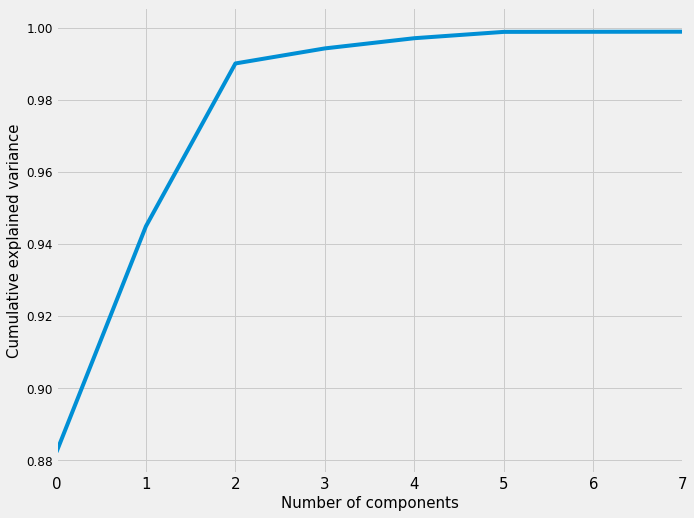

In [67]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10, 8))
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.tick_params(labelsize=12)
plt.xticks(size=15)
plt.xlabel('Number of components', size =15)
plt.ylabel('Cumulative explained variance',size =15)

In [68]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
x_pca = pca.transform(x)
x_pca

array([[-1.57570525e+01, -3.08036863e+00, -1.36474478e+00, ...,
        -4.54874105e-05,  1.18286457e-15,  2.65629532e-17],
       [-5.55653006e+00, -2.36733681e+00, -3.74387073e+00, ...,
         6.46963043e-05, -2.79240606e-14,  6.64615932e-17],
       [ 1.42692589e+00, -2.46089904e+00, -3.27597959e+00, ...,
        -5.17136623e-05,  4.04434515e-15,  3.25260652e-17],
       ...,
       [ 3.35245778e+01,  1.36869211e+00, -3.09542727e+00, ...,
         2.02662142e-05,  3.16120827e-15,  2.14672030e-17],
       [-2.80743875e+00, -4.89392950e+00, -3.96133571e-01, ...,
        -6.54742840e-05,  2.89069983e-14, -1.12648606e-16],
       [-1.23302567e+01, -5.40484225e+00, -7.46201114e+00, ...,
        -2.68732786e-05,  3.45849651e-15,  2.43945489e-17]])

In [73]:
results = pd.DataFrame()

In [74]:
results = results.append([a, b, c, d, e, f, g, h, i])
results.columns = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']
results['Model Runtime'] = [knn_runtime, rf_runtime, ab_runtime, gb_runtime, svm_runtime, dt_runtime, nb_runtime,
                            mnb_runtime, bt_runtime]
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score,Model Runtime
0,K Nearest Neighbors,0.826684,0.825523,0.825523,0.825274,0.585877
1,Random Forest,0.968373,0.967943,0.967943,0.967947,15.992004
2,Adapative Boosting Tree,0.238137,0.300012,0.300012,0.182979,5.352811
3,Gradient Boosting,0.782893,0.673682,0.673682,0.673034,237.158468
4,SVM,0.119493,0.112199,0.112199,0.113544,207.992672
5,Decision Tree,0.885059,0.884865,0.884865,0.884808,1.758622
6,Naive Bayes,0.605885,0.324483,0.324483,0.351780,0.783969
7,Multinomial Naive Bayes,0.486694,0.375138,0.375138,0.340993,0.114310
8,Bagged Trees,0.444615,0.350544,0.350544,0.239019,21.235933


In [75]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [76]:
probas = rfclassifier.predict_proba(x_test)

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


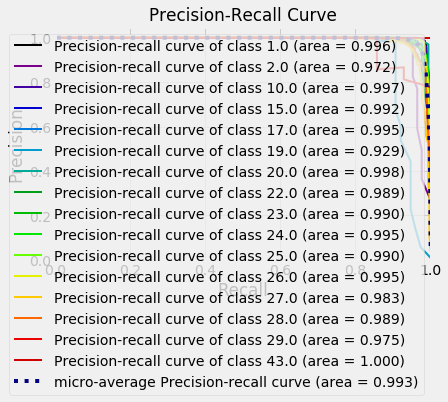

In [77]:
skplt.metrics.plot_precision_recall_curve(y_test, probas)

In [78]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_res, y_res = sm.fit_resample(x, y)

NameError: name 'SMOTE' is not defined